In [315]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 🧠 Preparing the Dataset

In [316]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sulianova/cardiovascular-disease-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Sakena\.cache\kagglehub\datasets\sulianova\cardiovascular-disease-dataset\versions\1


In [317]:
new_df = pd.read_csv('cardio_train.csv')

In [318]:
new_df.head(5)

,id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
0,0;18393;2;168;62.0;110;80;1;1;0;0;1;0
1,1;20228;1;156;85.0;140;90;3;1;0;0;1;1
2,2;18857;1;165;64.0;130;70;3;1;0;0;0;1
3,3;17623;2;169;82.0;150;100;1;1;0;0;1;1
4,4;17474;1;156;56.0;100;60;1;1;0;0;0;0


In [319]:
new_df = pd.read_csv('cardio_train.csv', sep=';')  # Replace with actual delimiter

In [320]:
new_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [321]:
old_df = pd.read_csv('heart_attack_prediction_dataset.csv')

In [322]:
old_df.head(2)

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0


# 📉 Data Cleaning and Optimization


In [323]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [324]:
new_df['height'].head()

0    168
1    156
2    165
3    169
4    156
Name: height, dtype: int64

In [325]:
new_df['weight']

0         62.0
1         85.0
2         64.0
3         82.0
4         56.0
         ...  
69995     76.0
69996    126.0
69997    105.0
69998     72.0
69999     72.0
Name: weight, Length: 70000, dtype: float64

In [326]:
# Step 1: Calculate BMI in new data 
new_df['BMI'] = new_df['weight'] / (new_df['height']/100)**2

new_df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'BMI'],
      dtype='object')

In [327]:
old_df.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [328]:
# # Step 2: Select columns to merge from old data
# # Define columns to merge (EXCLUDING 'Patient ID')
# cols_to_merge = ['Triglycerides', 'Physical Activity Days Per Week', 'Stress Level', 'Sleep Hours Per Day', 'Family History']

# # Merge without 'Patient ID'
# merged_df = pd.merge(
#     new_df, 
#     old_df[cols_to_merge],  # No 'Patient ID' here
#     left_index=True,         # Use index if no key column exists
#     right_index=True, 
#     how='left'
# )

In [329]:
# merged_df.columns

In [330]:
# merged_df.head()

In [331]:
# merged_df.isnull().sum()

In [332]:
new_df['gluc'].value_counts()

gluc
1    59479
3     5331
2     5190
Name: count, dtype: int64

In [333]:
new_df['gluc'].head(10)

0    1
1    1
2    1
3    1
4    1
5    2
6    1
7    3
8    1
9    1
Name: gluc, dtype: int64

In [334]:
# Create a diabetes_signal based on gluc value
new_df['diabetes_signal'] = new_df['gluc'].apply(lambda x: 1 if x > 1 else 0)

In [335]:
cols_to_merge = ['Triglycerides', 'Physical Activity Days Per Week', 'Family History']

In [336]:
import pandas as pd

# - 'Family History': 1 = لديه عامل وراثي, 0 = لا يوجد
# - 'cardio': 1 = لديه ذبحة قلبية, 0 = لا يوجد
# جدول تقاطعي (Cross-Tabulation)
contingency_table = pd.crosstab(
    old_df['Family History'], 
    old_df['Heart Attack Risk'], 
    margins=True,
    margins_name="Total"
)
contingency_table.columns = ["No Heart attak risk", "Has heart attak risk", "Total"]
contingency_table.index = ["No Family History", "Has Family History", "Total"]
print(contingency_table)

                    No Heart attak risk  Has heart attak risk  Total
No Family History                  2848                  1595   4443
Has Family History                 2776                  1544   4320
Total                              5624                  3139   8763


In [337]:
#نسبة الاصابة هل تزداد حسب تاريخ العائلة الصحي أم لا
# 2. تسمية الصفوف والأعمدة
contingency_table.columns = ["No Risk", "Has Risk", "Total"]
contingency_table.index = ["No Family History", "Has Family History", "Total"]

# 3. حساب النسب المئوية
valid_rows = contingency_table.iloc[:-1, :-1]  # استبعاد صف وإجمالي العمود
valid_totals = contingency_table.iloc[:-1, -1]  # إجمالي كل فئة

# 4. تجنب القسمة على صفر
valid_totals = valid_totals.replace(0, 1)  # إذا كان الإجمالي صفراً، استبدله بـ 1

# 5. حساب النسب المئوية
percentages = valid_rows.div(valid_totals, axis=0) * 100
percentages = percentages.round(1)

# 6. عرض النتائج
print("\nالنسب المئوية لكل فئة:")
print(percentages)


النسب المئوية لكل فئة:
                    No Risk  Has Risk
No Family History      64.1      35.9
Has Family History     64.3      35.7


اذا بغض النظر عن التاريخ الصحي للعائلة يوجد احتمال 36 بالمئة لحصول سكتة قلبية او اصابة بامراض القلب 

In [338]:
import numpy as np

# دالة لتوليد قيمة Family_History بناءً على قيمة cardio
def assign_family_history(row):
    # احتمال وجود تاريخ عائلي بناءً على التحليل (تقريبًا 36%)
    probability = 0.36
    return np.random.choice([1, 0], p=[probability, 1 - probability])

# إنشاء عمود Family_History باستخدام الدالة
new_df['Family_History'] = new_df.apply(assign_family_history, axis=1)


In [339]:
new_df['Family_History'].value_counts()

Family_History
0    44910
1    25090
Name: count, dtype: int64

In [340]:
hearGardaData = new_df

In [341]:
hearGardaData.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,diabetes_signal,Family_History
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,0,0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,0,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,0,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,0,0


In [342]:
hearGardaData['Heart Attack Risk'] = hearGardaData['cardio']

In [343]:
hearGardaData['age'].head()

0    18393
1    20228
2    18857
3    17623
4    17474
Name: age, dtype: int64

In [344]:
hearGardaData['age'] =(hearGardaData['age'] / 365.25).round().astype(int)  # قسمة على عدد الأيام في السنة (مع احتساب السنوات الكبيسة)

In [345]:
hearGardaData.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,diabetes_signal,Family_History,Heart Attack Risk
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,0,0,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,0,0,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,0,0,0


In [346]:
import pandas as pd

# Assuming you have a DataFrame named 'df'
hearGardaData.rename(columns={'ap_hi': 'Systolic'}, inplace=True)
hearGardaData.rename(columns={'ap_lo': 'Diastolic'}, inplace=True)


In [347]:
hearGardaData.head(5)

,id,age,gender,height,weight,Systolic,Diastolic,cholesterol,gluc,smoke,alco,active,cardio,BMI,diabetes_signal,Family_History,Heart Attack Risk
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,0,0,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,0,0,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,0,0,0


In [348]:
hearGardaData.tail(5)

,id,age,gender,height,weight,Systolic,Diastolic,cholesterol,gluc,smoke,alco,active,cardio,BMI,diabetes_signal,Family_History,Heart Attack Risk
69995,99993,53,2,168,76.0,120,80,1,1,1,0,1,0,26.927438,0,1,0
69996,99995,62,1,158,126.0,140,90,2,2,0,0,1,1,50.472681,1,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1,31.353579,0,1,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1,27.099251,1,1,1
69999,99999,56,1,170,72.0,120,80,2,1,0,0,1,0,24.913495,0,0,0


In [349]:
hearGardaData=hearGardaData.drop(columns=['id','cardio'])

# 🔍Exploratory Data Analysis (EDA)

In [350]:
hearGardaData.isnull().sum()

age                  0
gender               0
height               0
weight               0
Systolic             0
Diastolic            0
cholesterol          0
gluc                 0
smoke                0
alco                 0
active               0
BMI                  0
diabetes_signal      0
Family_History       0
Heart Attack Risk    0
dtype: int64

In [351]:
hearGardaData.dropna()  


,age,gender,height,weight,Systolic,Diastolic,cholesterol,gluc,smoke,alco,active,BMI,diabetes_signal,Family_History,Heart Attack Risk
0,50,2,168,62.0,110,80,1,1,0,0,1,21.967120,0,0,0
1,55,1,156,85.0,140,90,3,1,0,0,1,34.927679,0,0,1
2,52,1,165,64.0,130,70,3,1,0,0,0,23.507805,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,28.710479,0,1,1
4,48,1,156,56.0,100,60,1,1,0,0,0,23.011177,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,53,2,168,76.0,120,80,1,1,1,0,1,26.927438,0,1,0
69996,62,1,158,126.0,140,90,2,2,0,0,1,50.472681,1,1,1
69997,52,2,183,105.0,180,90,3,1,0,1,0,31.353579,0,1,1
69998,61,1,163,72.0,135,80,1,2,0,0,0,27.099251,1,1,1


In [352]:
hearGardaData.dtypes

age                    int64
gender                 int64
height                 int64
weight               float64
Systolic               int64
Diastolic              int64
cholesterol            int64
gluc                   int64
smoke                  int64
alco                   int64
active                 int64
BMI                  float64
diabetes_signal        int64
Family_History         int64
Heart Attack Risk      int64
dtype: object

In [353]:
hearGardaData.describe()

,age,gender,height,weight,Systolic,Diastolic,cholesterol,gluc,smoke,alco,active,BMI,diabetes_signal,Family_History,Heart Attack Risk
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.303157,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,27.556513,0.150300,0.358429,0.499700
std,6.760171,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,6.091511,0.357368,0.479542,0.500003
min,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.471784,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,23.875115,0.000000,0.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,26.374068,0.000000,0.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,30.222222,0.000000,1.000000,1.000000
max,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,298.666667,1.000000,1.000000,1.000000


### outliers Systolic

In [354]:
hearGardaData.loc[(hearGardaData['Systolic'] <= 50) | (hearGardaData['Systolic'] >= 250), ['Systolic', 'Diastolic']].head(10)

,Systolic,Diastolic
567,14,90
927,14,90
979,11,80
1600,12,80
1627,14,80
1772,11,60
1876,902,60
2014,906,0
2167,14,80
2203,12,80


In [355]:
len(hearGardaData.loc[(hearGardaData['Systolic'] <= 50) | (hearGardaData['Systolic'] >= 250), ['Systolic', 'Diastolic']])

228

In [356]:
systolic_mode = hearGardaData['Systolic'].mode()[0]
systolic_mode

np.int64(120)

In [357]:
hearGardaData.loc[(hearGardaData['Systolic'] <= 50) | (hearGardaData['Systolic'] >= 250), 'Systolic'] = systolic_mode

### outliers Diastolic

In [358]:
hearGardaData.loc[(hearGardaData['Diastolic'] <= 30) | (hearGardaData['Diastolic'] >= 150), ['Systolic', 'Diastolic']].head(10)

,Systolic,Diastolic
228,160,1100
241,160,1000
260,140,800
329,160,1000
345,140,1000
418,150,30
473,150,1033
474,120,150
559,200,1000
613,140,1000


In [359]:
len(hearGardaData.loc[(hearGardaData['Diastolic'] <= 30) | (hearGardaData['Diastolic'] >= 150), ['Systolic', 'Diastolic']].head(10))

10

In [360]:
Diastolic_mode = hearGardaData['Diastolic'].mode()[0]
Diastolic_mode

np.int64(80)

In [361]:
hearGardaData.loc[(hearGardaData['Diastolic'] <= 30) | (hearGardaData['Diastolic'] >= 150), 'Diastolic'] = systolic_mode

In [362]:
# #option 2 
# # استبدال بالقيمة المتوسطة (median)
# diastolic_median = hearGardaData['Diastolic'].median()
# hearGardaData.loc[(hearGardaData['Diastolic'] <= 30) | (hearGardaData['Diastolic'] >= 150), 'Diastolic'] = diastolic_median


### height & weight

count    70000.000000
mean        74.205690
std         14.395757
min         10.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        200.000000
Name: weight, dtype: float64
count    70000.000000
mean       164.359229
std          8.210126
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: height, dtype: float64


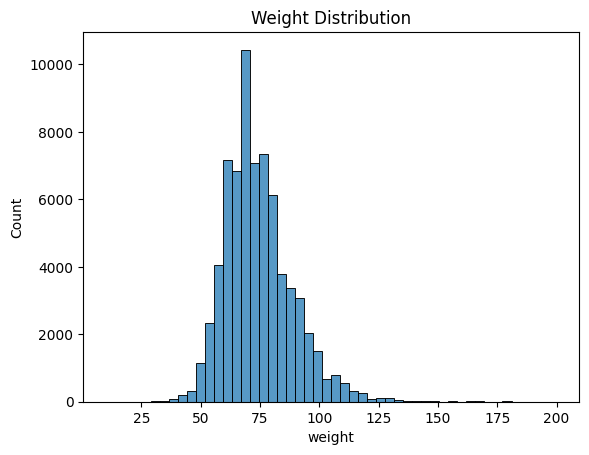

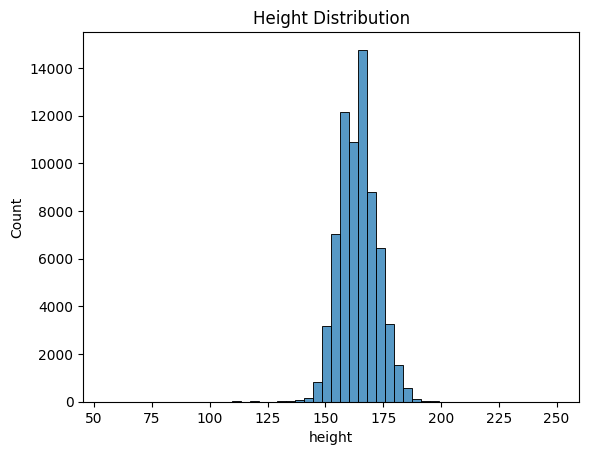

In [363]:
# ملخص إحصائي
print(hearGardaData['weight'].describe())
print(hearGardaData['height'].describe())

# رسم توزيع الوزن والطول (اختياري لو تريد تصور أوضح)
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(hearGardaData['weight'], bins=50)
plt.title('Weight Distribution')
plt.show()

sns.histplot(hearGardaData['height'], bins=50)
plt.title('Height Distribution')
plt.show()


In [364]:
# عدد القيم الشاذة للوزن
len( hearGardaData[(hearGardaData['weight'] <= 30) | (hearGardaData['weight'] >= 200)])

12

In [365]:
len( hearGardaData[(hearGardaData['weight'] <= 30)])

10

In [366]:
len( hearGardaData[(hearGardaData['weight'] >= 200)])

2

In [367]:
hearGardaData.loc[(hearGardaData['weight'] <= 30) | (hearGardaData['weight'] >= 200), ['age', 'weight']].head(20)

,age,weight
435,46,200.0
3752,42,30.0
18559,50,30.0
26806,64,23.0
29488,56,22.0
33817,59,11.0
34276,40,28.0
41905,58,30.0
50413,41,200.0
57858,51,10.0


In [368]:
hearGardaData.loc[(hearGardaData['weight'] == 200)]

,age,gender,height,weight,Systolic,Diastolic,cholesterol,gluc,smoke,alco,active,BMI,diabetes_signal,Family_History,Heart Attack Risk
435,46,1,186,200.0,130,70,1,1,0,0,0,57.810151,0,1,0
50413,41,2,180,200.0,150,90,1,1,0,0,1,61.728395,0,0,1


In [369]:
hearGardaData = hearGardaData[(hearGardaData['weight'] > 30)]

In [370]:
# عدد القيم الشاذة للطول
len( hearGardaData[(hearGardaData['height'] <= 120) | (hearGardaData['height'] >= 210)])

86

In [371]:
len( hearGardaData[(hearGardaData['height'] <= 120) ])

85

In [372]:
hearGardaData.loc[(hearGardaData['height'] <= 120) | (hearGardaData['height'] >= 210), ['age', 'height']].head(20)

,age,height
224,60,76
3420,40,100
3735,48,120
4212,44,120
6486,58,250
6821,59,120
7116,56,117
7305,43,120
7598,40,70
8171,48,97


In [373]:
hearGardaData = hearGardaData[(hearGardaData['height'] > 120) & (hearGardaData['height'] <= 210)]

In [374]:
len( hearGardaData[(hearGardaData['height'] <= 120) & (hearGardaData['height'] >= 210)])

0

In [375]:
hearGardaData.shape

(69904, 15)

### colesterol

#### Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |


In [376]:
hearGardaData.columns


Index(['age', 'gender', 'height', 'weight', 'Systolic', 'Diastolic',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'BMI',
       'diabetes_signal', 'Family_History', 'Heart Attack Risk'],
      dtype='object')

In [377]:
hearGardaData['cholesterol'].value_counts()

cholesterol
1    52308
2     9538
3     8058
Name: count, dtype: int64

In [378]:
# hearGardaData['cholesterol'] = hearGardaData['cholesterol'].map({1: 'normal', 2: 'above_normal', 3:'well_above_normal'})

In [379]:
hearGardaData['cholesterol']

0        1
1        3
2        3
3        1
4        1
        ..
69995    1
69996    2
69997    3
69998    1
69999    2
Name: cholesterol, Length: 69904, dtype: int64

In [380]:
# hearGardaData = pd.get_dummies(hearGardaData, columns=['cholesterol'], drop_first=False)

In [381]:
hearGardaData.head(2)

,age,gender,height,weight,Systolic,Diastolic,cholesterol,gluc,smoke,alco,active,BMI,diabetes_signal,Family_History,Heart Attack Risk
0,50,2,168,62.0,110,80,1,1,0,0,1,21.967120,0,0,0
1,55,1,156,85.0,140,90,3,1,0,0,1,34.927679,0,0,1


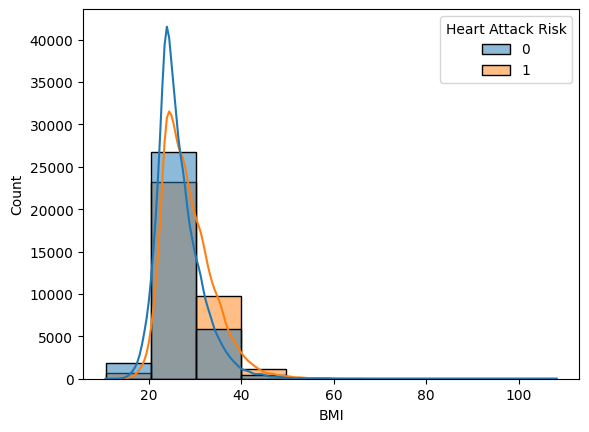

In [382]:
sns.histplot(data=hearGardaData,x="BMI",hue="Heart Attack Risk",kde=True,bins=10)
plt.show()


if your BMI is:

below 18.5 – you're in the underweight range
between 18.5 and 24.9 – you're in the healthy weight range
between 25 and 29.9 – you're in the overweight range
between 30 and 39.9 – you're in the obese range
Reference:

In [383]:
hearGardaData.loc[(hearGardaData.BMI <= 18.4), 'BMI'] = 1
hearGardaData.loc[(hearGardaData.BMI > 18.4) & (hearGardaData.BMI < 25), 'BMI'] = 2
hearGardaData.loc[(hearGardaData.BMI >= 25) & (hearGardaData.BMI < 30), 'BMI'] = 3
hearGardaData.loc[(hearGardaData.BMI >= 30) & (hearGardaData.BMI < 40), 'BMI'] = 4
hearGardaData.loc[(hearGardaData.BMI >= 40), 'BMI'] = 5

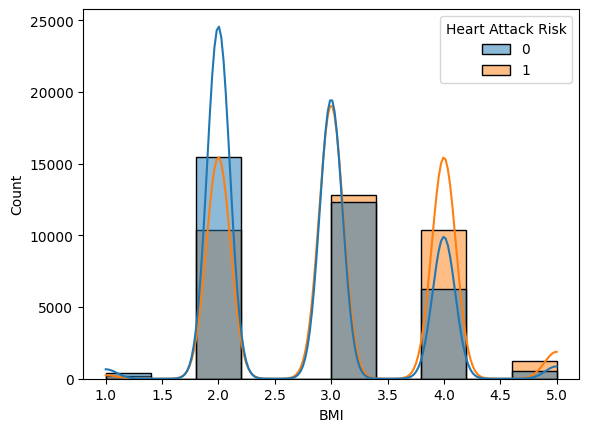

In [384]:
sns.histplot(data=hearGardaData,x="BMI",hue="Heart Attack Risk",kde=True,bins=10)
plt.show()


In [385]:
hearGardaData['BMI'].value_counts()

BMI
2.0    25851
3.0    25086
4.0    16588
5.0     1801
1.0      578
Name: count, dtype: int64

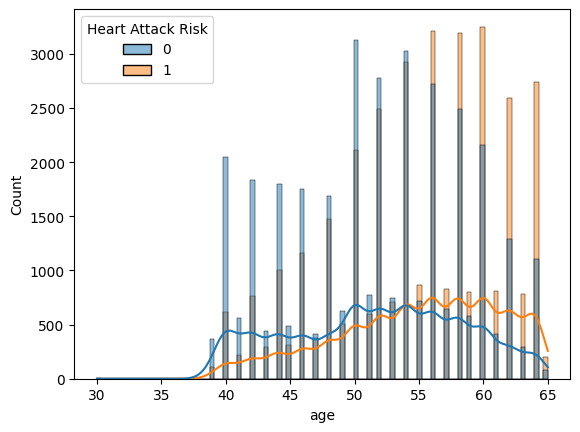

In [386]:
sns.histplot(data=hearGardaData,x="age",hue="Heart Attack Risk",bins=100,kde=True)
plt.show()
# We can s

In [387]:
smoking_counts=hearGardaData["smoke"].value_counts()
smoking_counts

smoke
0    63742
1     6162
Name: count, dtype: int64

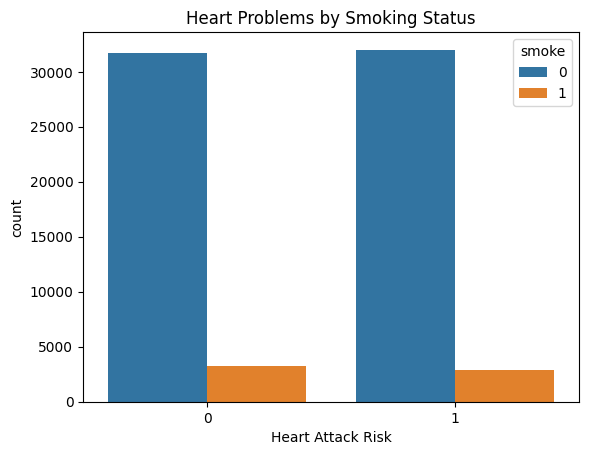

In [388]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot smoking vs heart problems
sns.countplot(data=hearGardaData, x='Heart Attack Risk', hue='smoke')
plt.title('Heart Problems by Smoking Status')
plt.show()

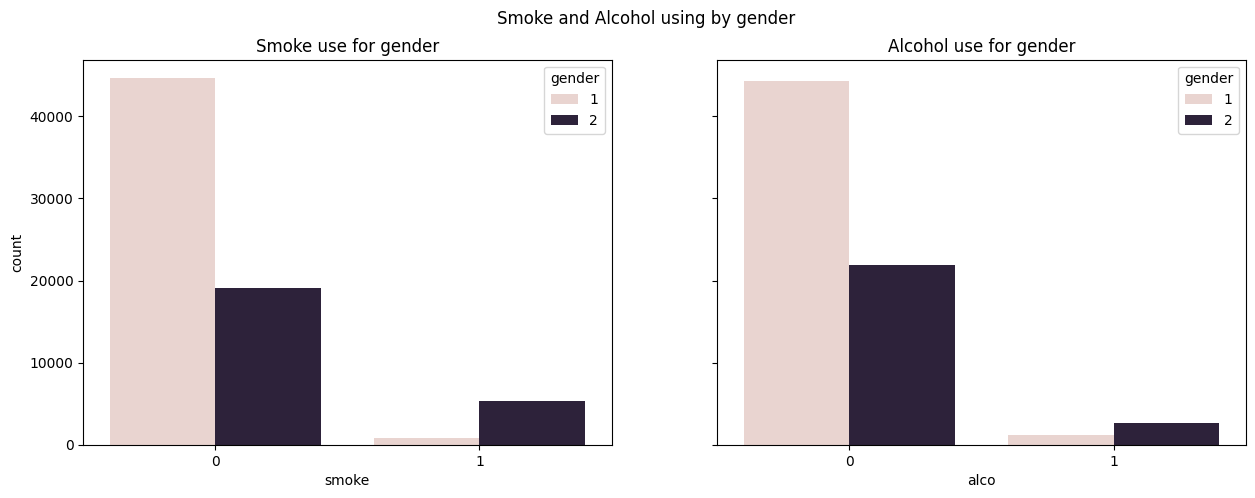

In [389]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Smoke and Alcohol using by gender')

# Bulbasaur
sns.countplot(ax=axes[0], x=hearGardaData.smoke,hue=hearGardaData.gender)
axes[0].set_title("Smoke use for gender")

# Charmander
sns.countplot(ax=axes[1], x=hearGardaData.alco,hue=hearGardaData.gender)
axes[1].set_title("Alcohol use for gender")
plt.show()

In [390]:
#Total number of male and female
gender_count=hearGardaData["gender"].value_counts()# 1 Male 2 Female
gender_count

gender
1    45470
2    24434
Name: count, dtype: int64

In [391]:
sex_heart_attacks = hearGardaData[hearGardaData['Heart Attack Risk'] == 1]['gender'].value_counts()
sex_heart_attacks

gender
1    22588
2    12345
Name: count, dtype: int64

In [392]:
hearGardaData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69904 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                69904 non-null  int64  
 1   gender             69904 non-null  int64  
 2   height             69904 non-null  int64  
 3   weight             69904 non-null  float64
 4   Systolic           69904 non-null  int64  
 5   Diastolic          69904 non-null  int64  
 6   cholesterol        69904 non-null  int64  
 7   gluc               69904 non-null  int64  
 8   smoke              69904 non-null  int64  
 9   alco               69904 non-null  int64  
 10  active             69904 non-null  int64  
 11  BMI                69904 non-null  float64
 12  diabetes_signal    69904 non-null  int64  
 13  Family_History     69904 non-null  int64  
 14  Heart Attack Risk  69904 non-null  int64  
dtypes: float64(2), int64(13)
memory usage: 8.5 MB


In [393]:
hearGardaData.head(5)

,age,gender,height,weight,Systolic,Diastolic,cholesterol,gluc,smoke,alco,active,BMI,diabetes_signal,Family_History,Heart Attack Risk
0,50,2,168,62.0,110,80,1,1,0,0,1,2.0,0,0,0
1,55,1,156,85.0,140,90,3,1,0,0,1,4.0,0,0,1
2,52,1,165,64.0,130,70,3,1,0,0,0,2.0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,3.0,0,1,1
4,48,1,156,56.0,100,60,1,1,0,0,0,2.0,0,0,0


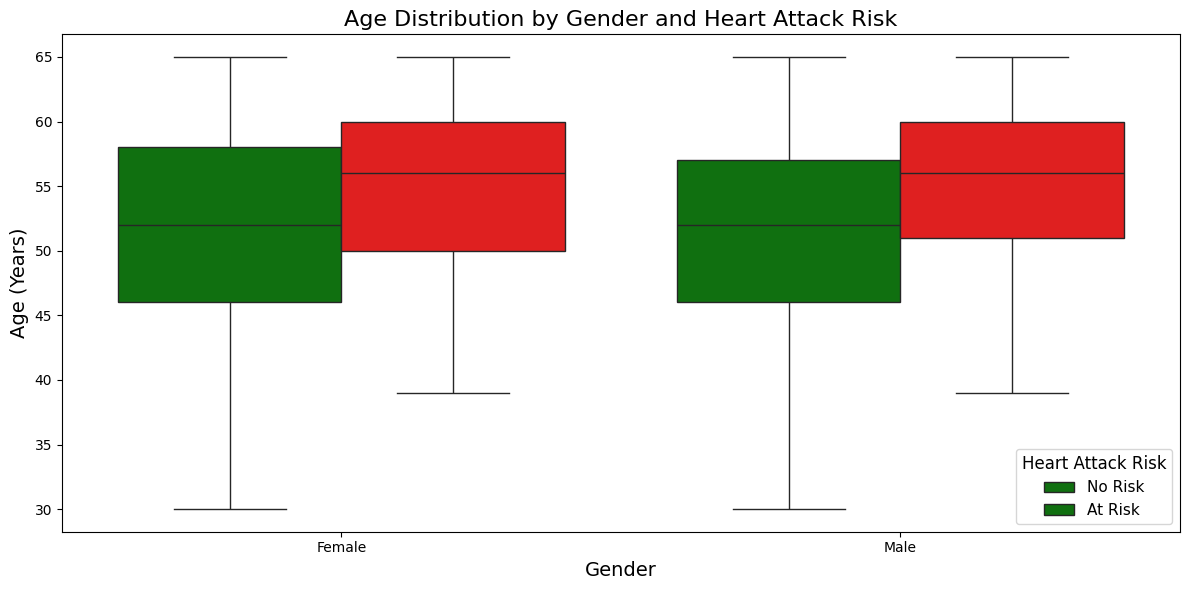

In [394]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Prepare the data
hearGardaData['gender_label'] = hearGardaData['gender'].map({1: 'Male', 2: 'Female'})

# 2. Create the plot
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='gender_label',
    y='age',
    hue='Heart Attack Risk',
    data=hearGardaData,
    palette={0: 'green', 1: 'red'},
    hue_order=[0, 1]
)

# 3. Customize the plot
plt.title('Age Distribution by Gender and Heart Attack Risk', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Age (Years)', fontsize=14)
plt.legend(
    title='Heart Attack Risk',
    labels=['No Risk', 'At Risk'],
    title_fontsize=12,
    fontsize=11
)

# 4. Show the plot
plt.tight_layout()
plt.show()

In [395]:
hearGardaData.columns

Index(['age', 'gender', 'height', 'weight', 'Systolic', 'Diastolic',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'BMI',
       'diabetes_signal', 'Family_History', 'Heart Attack Risk',
       'gender_label'],
      dtype='object')

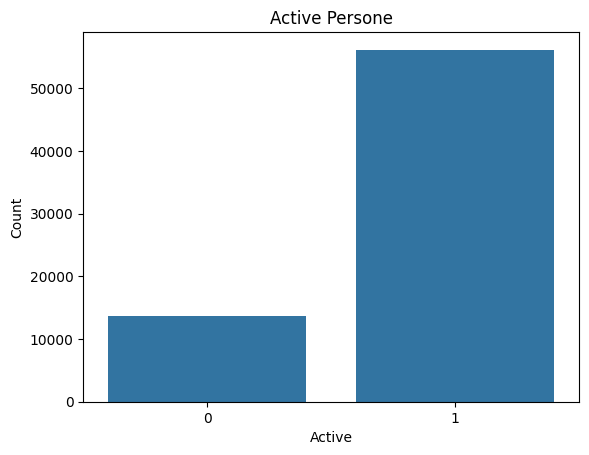

In [396]:
sns.countplot(x='active', data=hearGardaData)
plt.title('Active Persone')
plt.xlabel('Active') 
plt.ylabel('Count')
plt.show()

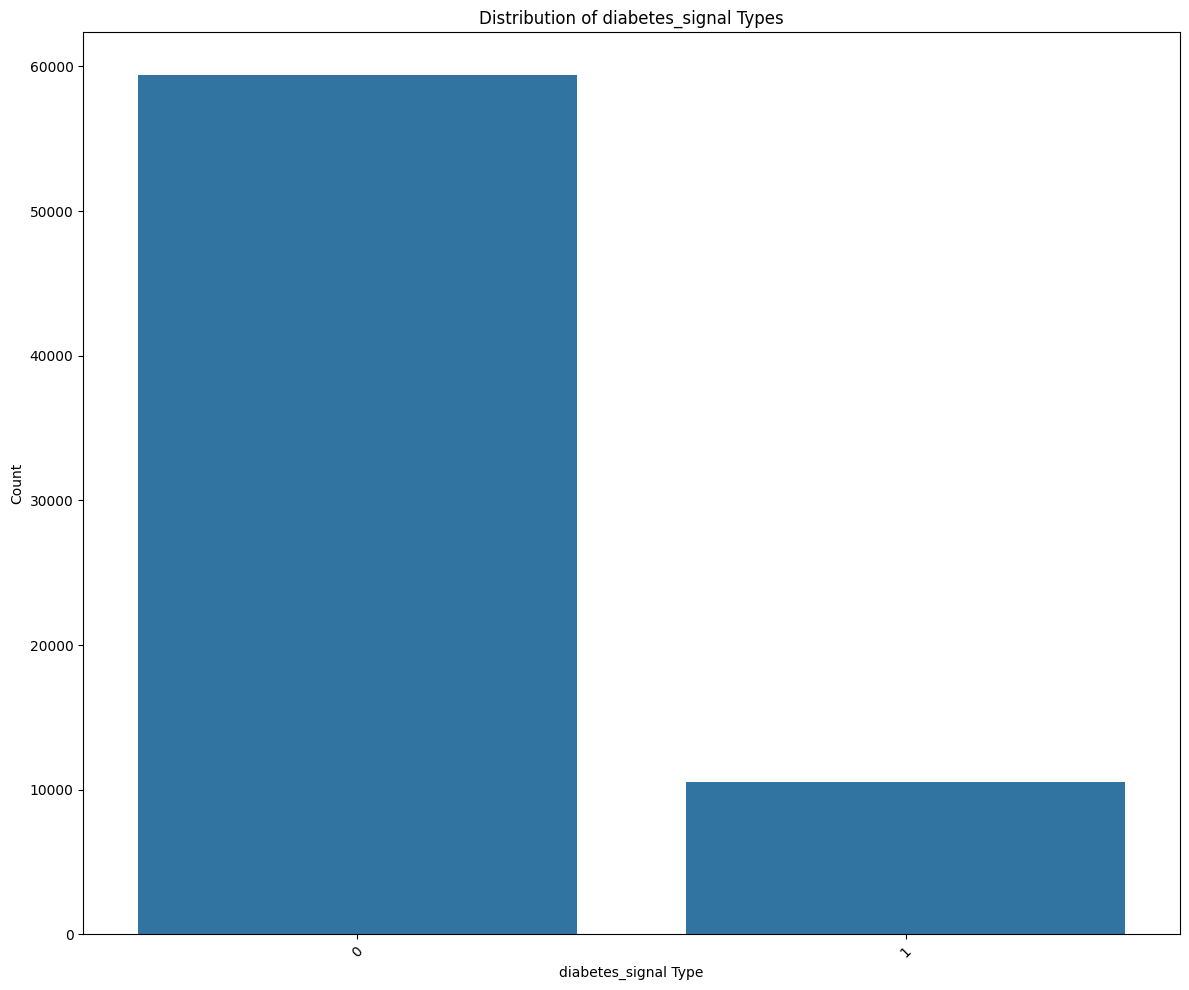

In [397]:
# Example: count how many of each 'Diet' type
plt.figure(figsize=(12, 10))
sns.countplot(x='diabetes_signal', data=hearGardaData)
plt.title('Distribution of diabetes_signal Types')
plt.xlabel('diabetes_signal Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [398]:
hearGardaData.columns

Index(['age', 'gender', 'height', 'weight', 'Systolic', 'Diastolic',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'BMI',
       'diabetes_signal', 'Family_History', 'Heart Attack Risk',
       'gender_label'],
      dtype='object')

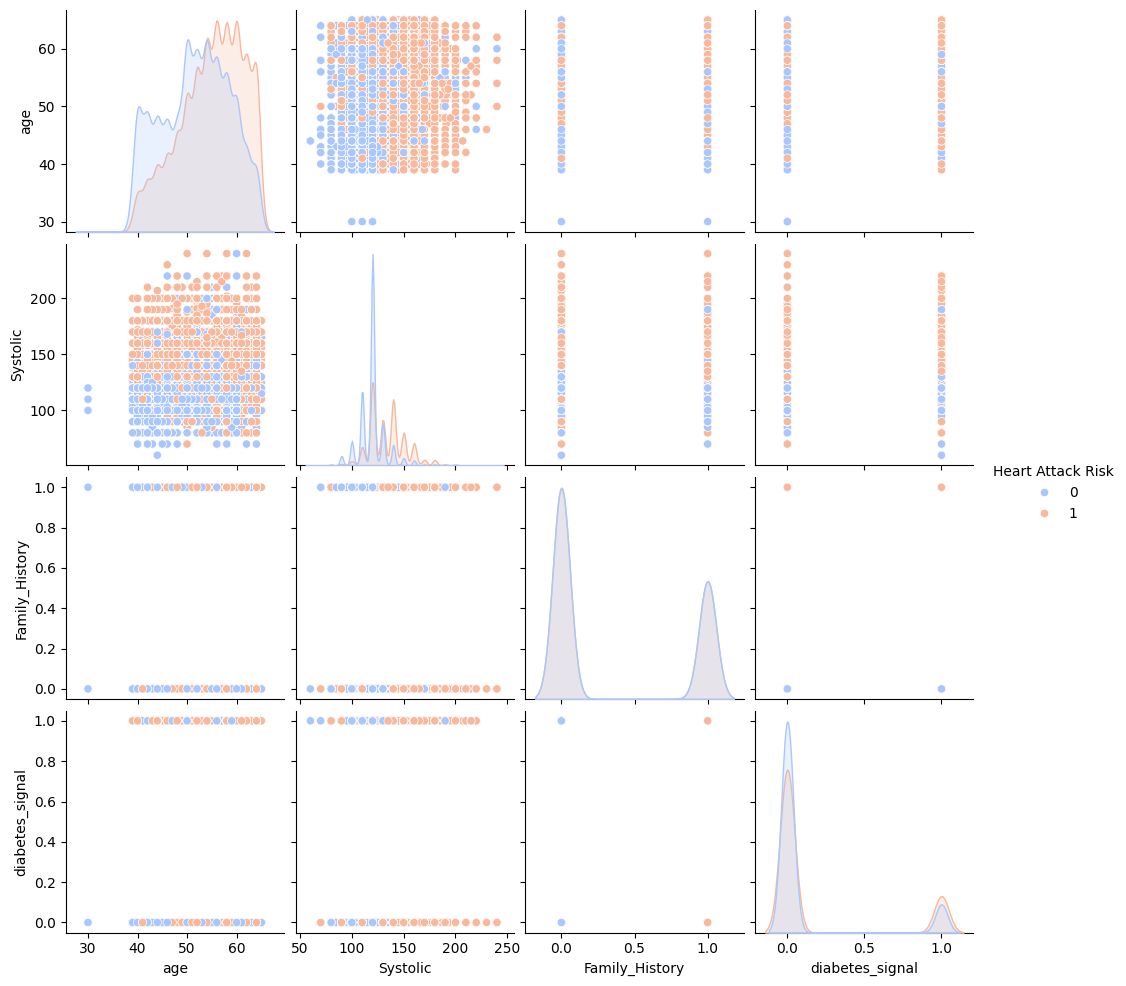

In [399]:
# Select a few numerical columns to avoid clutter
selected_cols = ['age', 'Systolic', 'Family_History', 'diabetes_signal', 'Heart Attack Risk']

# Draw pair plot
sns.pairplot(hearGardaData[selected_cols], hue='Heart Attack Risk', palette='coolwarm')
plt.show()



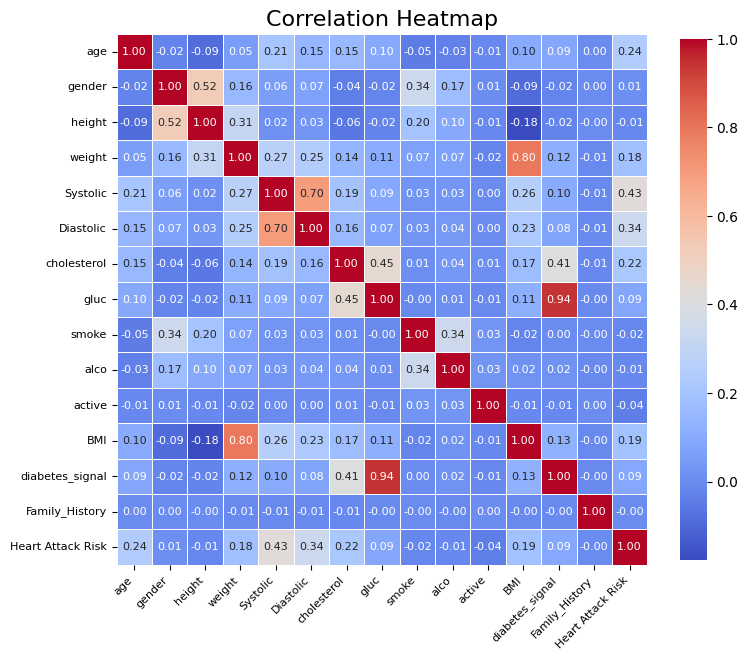

In [400]:

plt.figure(figsize=(8, 8))  # Increase size for clarity

corr_matrix = hearGardaData.corr(numeric_only=True)

sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            linewidths=0.5,
            square=True,
            cbar_kws={"shrink": 0.7},
            annot_kws={"size": 8})

plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()
plt.show()




In [401]:
hearGardaData.columns

Index(['age', 'gender', 'height', 'weight', 'Systolic', 'Diastolic',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'BMI',
       'diabetes_signal', 'Family_History', 'Heart Attack Risk',
       'gender_label'],
      dtype='object')

In [402]:
hearGardaData.drop(columns=['gender_label'],inplace=True)

In [403]:
hearGardaData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69904 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                69904 non-null  int64  
 1   gender             69904 non-null  int64  
 2   height             69904 non-null  int64  
 3   weight             69904 non-null  float64
 4   Systolic           69904 non-null  int64  
 5   Diastolic          69904 non-null  int64  
 6   cholesterol        69904 non-null  int64  
 7   gluc               69904 non-null  int64  
 8   smoke              69904 non-null  int64  
 9   alco               69904 non-null  int64  
 10  active             69904 non-null  int64  
 11  BMI                69904 non-null  float64
 12  diabetes_signal    69904 non-null  int64  
 13  Family_History     69904 non-null  int64  
 14  Heart Attack Risk  69904 non-null  int64  
dtypes: float64(2), int64(13)
memory usage: 8.5 MB


# 🧪 Model Training and Evaluation


In [404]:
hearGardaData['Heart Attack Risk'].value_counts()

Heart Attack Risk
0    34971
1    34933
Name: count, dtype: int64

In [405]:
hearGardaData.shape

(69904, 15)

In [406]:
from sklearn.model_selection import train_test_split

# Define features and target
X = hearGardaData.drop(['Heart Attack Risk'], axis=1)
y = hearGardaData['Heart Attack Risk']

In [407]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# تقسيم البيانات أولاً
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)



In [408]:
from sklearn.ensemble import RandomForestClassifier
#for
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

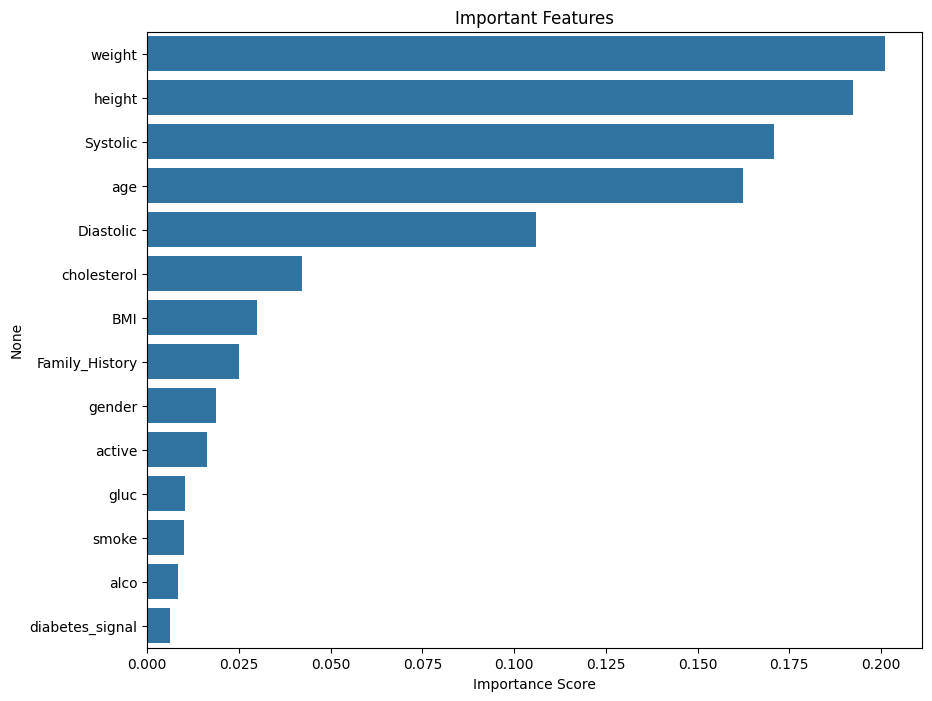

In [409]:
importances = rf.feature_importances_
features = X.columns

# Create Series and sort
feat_importances = pd.Series(importances, index=features).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x=feat_importances.values[:16], y=feat_importances.index[:16])
plt.title('Important Features')
plt.xlabel('Importance Score')
plt.show()


In [410]:
# feat_importances['']

## all features

In [411]:
rf_reduced = RandomForestClassifier(n_estimators=200, random_state=55,class_weight='balanced')
rf_reduced.fit(X_train, y_train)

# Evaluate
accuracy = rf_reduced.score(X_test, y_test)
print(f"Accuracy after feature selection: {accuracy:.2f}")


Accuracy after feature selection: 0.71


## select features

In [412]:
selected_features = feat_importances[feat_importances > 0.02].index
X_train_reduced = X_train[selected_features]
X_test_reduced = X_test[selected_features]


In [413]:
rf_reduced = RandomForestClassifier(n_estimators=200, random_state=55,class_weight='balanced')
rf_reduced.fit(X_train_reduced, y_train)

# Evaluate
accuracy = rf_reduced.score(X_test_reduced, y_test)
print(f"Accuracy after feature selection: {accuracy:.2f}")


Accuracy after feature selection: 0.70


In [414]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


# Train XGBoost with class weighting (if imbalanced)
xgb = XGBClassifier(
    eval_metric="auc",
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1
)
xgb.fit(X_train_reduced, y_train)

# Evaluate

y_pred_xgb = xgb.predict(X_test_reduced)
print(classification_report(y_test, y_pred_xgb))





              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6994
           1       0.76      0.68      0.72      6987

    accuracy                           0.73     13981
   macro avg       0.74      0.73      0.73     13981
weighted avg       0.74      0.73      0.73     13981



In [415]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(class_weight='balanced')
log_reg.fit(X_train_reduced, y_train)


LogisticRegression(class_weight='balanced')

In [416]:
accuracy = log_reg.score(X_test_reduced, y_test)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.72


# 🧮 Predicting Heart Attack Risk

In [417]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# افترض أنك عندك تنبؤات واحتمالات من 3 موديلات:
models = {
    "Random Forest": (rf_reduced, X_test_reduced),
    "XGBoost": (xgb, X_test_reduced),
    "Logistic Regression": (log_reg, X_test_reduced)  # افترض أنك دربت logistic
}

results = {"Model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1-score": [], "ROC AUC": []}

for name, (model, X) in models.items():
    y_pred = model.predict(X)
    y_proba = model.predict_proba(X)[:, 1]

    results["Model"].append(name)
    results["Accuracy"].append(accuracy_score(y_test, y_pred))
    results["Precision"].append(precision_score(y_test, y_pred))
    results["Recall"].append(recall_score(y_test, y_pred))
    results["F1-score"].append(f1_score(y_test, y_pred))
    results["ROC AUC"].append(roc_auc_score(y_test, y_proba))

# عرض الجدول النهائي
import pandas as pd
df_results = pd.DataFrame(results)
print(df_results.round(2))


                 Model  Accuracy  Precision  Recall  F1-score  ROC AUC
0        Random Forest      0.70       0.70    0.69      0.69     0.75
1              XGBoost      0.73       0.76    0.68      0.72     0.80
2  Logistic Regression      0.72       0.75    0.67      0.71     0.78


# 🖼️ Creating a Simple User Interface 


In [418]:
import joblib

# Save the trained model to a file
joblib.dump(xgb, 'heart_disease_model.pkl')


['heart_disease_model.pkl']